# PCA through Singular Value Decomposition

In [2]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])


#Covariance matrix:
R=X@np.transpose(X)/3
# print(R)
# We can also use the code: R=np.matmul(X,X.T)/3

# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition, in U and V we have de eigen vectors

u1=U[:,0] # new basis vectors
u2=U[:,1]
# print(U)

# Calculate the coordinates in new orthonormal basis:
x1=np.transpose(X)@u1
x2=np.transpose(X)@u2
#print(x1)
#print(x2)

#print(Xi1[:,None]) # add second dimention to array and test it
Xaprox=np.matmul(u1[:,None],x1[None,:]) #+np.matmul(u2[:,None],x2[None,:])
print(Xaprox)
# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it


# Check that you got the original


[[1.80720735 1.27357371 0.        ]
 [4.08528566 2.87897923 0.        ]]


# PCA on Iris data

In [3]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

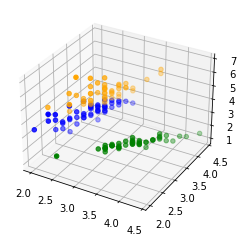

In [4]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='orange')
plt.show

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


<function matplotlib.pyplot.show(close=None, block=None)>

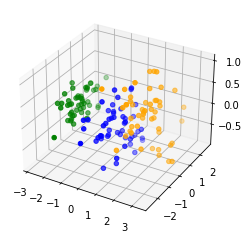

In [5]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)  # Data processed applying PCA


# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())


# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='orange')
plt.show


In [6]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

The variance on the three different dimensions of the data we have, then on the ratio we see that the 70% of the variance is at the first dimension.

In [7]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

So maybe the third dimension is not that imnportant for us, so we can continue without using it, since it is not bringing us useful info.

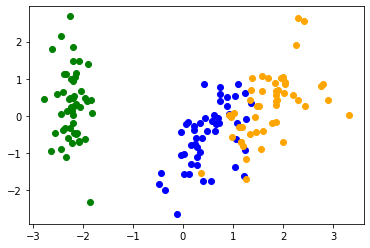

In [8]:
# Plot the principal components in 2D, mark different targets in color

plt.scatter(Xpca[y==0,0],Xpca[y==0,1],color='green')
plt.scatter(Xpca[y==1,0],Xpca[y==1,1],color='blue')
plt.scatter(Xpca[y==2,0],Xpca[y==2,1],color='orange')

# KNN classifier

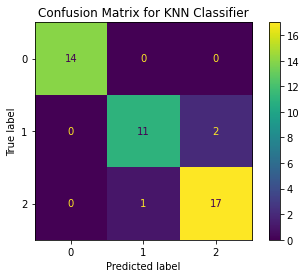

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X
# Create a KNN classifier and fit it on the training data
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn1.predict(X_test)

# Computation of the confusion matrix and plot it
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Add labels and title to the plot
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN Classifier')

# Show the plot
plt.show()



Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns). 

/ Compare the results with full dataset


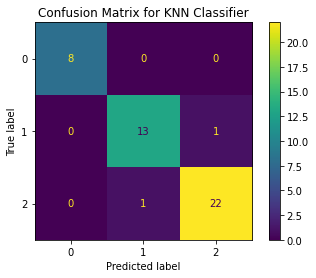

In [10]:
# Split the data, from the PCA this time, into training and testing sets
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(Xpca, y, test_size=0.3)

# Create a KNN classifier and fit it on the training data
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(Xpca_train, ypca_train)

# Make predictions on the test set
ypca_pred = knn2.predict(Xpca_test)

# Compute the confusion matrix and plot it
cm = confusion_matrix(ypca_test, ypca_pred)
ConfusionMatrixDisplay.from_predictions(ypca_test, ypca_pred)

# Add labels and title to the plot
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN Classifier')

# Show the plot
plt.show()

Now do the same, but use only 2-dimensional data of original X (first two columns)

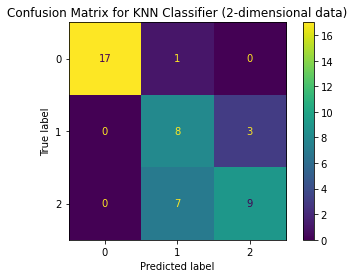

In [11]:
# Select only the first two columns of the original data as X2
X2 = X[:, :2]

# Split the 2-dimensional data into training and testing sets
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3)

# Train a KNN classifier on the 2-dimensional training data
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X2_train, y_train)

# Make predictions on the 2-dimensional test set
y2_pred = knn2.predict(X2_test)

# Compute the confusion matrix for the 2-dimensional data and plot it
cm2 = confusion_matrix(y_test, y2_pred)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=np.unique(y))
disp2.plot()

# Add labels and title to the 2-dimensional plot
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNN Classifier (2-dimensional data)')

# Show the 2-dimensional plot
plt.show()


In [12]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score for the full data
y_pred = knn1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)

# Calculate the accuracy score for the 2-dimensional data
y2_pred = knn2.predict(X2_test)
accuracy2 = accuracy_score(y_test, y2_pred)

accuracy3 = accuracy_score(ypca_test, ypca_pred)
# Print the accuracies for comparison
print("Accuracy for full data: {:.2f}%".format(accuracy1 * 100))
print("Accuracy for PCA data: {:.2f}%".format(accuracy3 * 100))
print("Accuracy for 2-dimensional data: {:.2f}%".format(accuracy2 * 100))



Accuracy for full data: 24.44%
Accuracy for PCA data: 95.56%
Accuracy for 2-dimensional data: 75.56%
